<a href="https://colab.research.google.com/github/LucasTonolli/collab-machine-learning/blob/main/Avalia%C3%A7%C3%A3o_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuração

## Importações

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

import kagglehub


## Carregamento do Dataset

In [ ]:
dataset = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "atharvasoundankar/global-cybersecurity-threats-2015-2024",
    "Global_Cybersecurity_Threats_2015-2024.csv",
)

Using Colab cache for faster access to the 'global-cybersecurity-threats-2015-2024' dataset.


# Análise de Dados Originais

## Visualização dos dados iniciais

In [ ]:
dataset.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


## Verificação de tipo de dados

In [ ]:
dataset.dtypes

,0
Country,object
Year,int64
Attack Type,object
Target Industry,object
Financial Loss (in Million $),float64
Number of Affected Users,int64
Attack Source,object
Security Vulnerability Type,object
Defense Mechanism Used,object
Incident Resolution Time (in Hours),int64


Informações

In [ ]:
import pandas as pd

# --- Configuração Inicial ---
print("### RELATÓRIO DE ANÁLISE DOS DADOS ORIGINAIS ###\n")

# a. Quantidade de atributos e f. Quantidade de instâncias
n_linhas, n_colunas = dataset.shape
print(f"f. Total de Instâncias (Exemplos): {n_linhas}")
print(f"a. Total de Atributos (Colunas): {n_colunas}")
print("-" * 40)

# c. Intervalo ou Conjunto de Valores de cada atributo
print("\nc. Intervalo ou Conjunto de Valores:")
for col in dataset.columns:
    # Se for numérico, mostra o intervalo (Min - Max)
    if pd.api.types.is_numeric_dtype(dataset[col]):
        min_val = dataset[col].min()
        max_val = dataset[col].max()
        print(f"   - {col}: Numérico [{min_val} até {max_val}]")

    # Se for categórico/texto, mostra TODOS os valores únicos
    else:
        unique_vals = dataset[col].unique()
        n_unique = len(unique_vals)

        # Tenta ordenar para ficar mais organizado visualmente
        try:
            unique_vals = sorted(unique_vals)
        except:
            pass # Se der erro (tipos mistos), mantém a ordem original

        # Cria a string com TODOS os valores
        valores_str = ", ".join(map(str, unique_vals))

        print(f"   - {col}: Categórico ({n_unique} valores únicos) -> {{ {valores_str} }}")

print("-" * 40)

# d. Atributos com valores faltando
print("\nd. Valores Faltando (Missing Values):")
missing_data = dataset.isnull().sum()
missing_cols = missing_data[missing_data > 0]

if missing_cols.empty:
    print("   Nenhum atributo possui valores faltando.")
else:
    for col, count in missing_cols.items():
        print(f"   - {col}: {count} valores ausentes")

print("-" * 40)

# e. Qual atributo é o mais desbalanceado
print("\ne. Análise de Desbalanceamento (Atributos Categóricos):")
max_imbalance = 0
most_imbalanced_col = "Nenhum"
top_val_info = ""

categorical_cols = dataset.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    # Calcula a porcentagem de cada valor
    value_counts = dataset[col].value_counts(normalize=True)

    # Proteção caso a coluna esteja vazia
    if not value_counts.empty:
        top_value = value_counts.index[0]
        top_perc = value_counts.iloc[0]

        # Verifica se é o mais desbalanceado até agora
        if top_perc > max_imbalance:
            max_imbalance = top_perc
            most_imbalanced_col = col
            top_val_info = f"Valor '{top_value}' aparece em {top_perc:.2%} dos casos"

if categorical_cols.empty:
    print("   Não há atributos categóricos para analisar desbalanceamento.")
else:
    print(f"   Atributo mais desbalanceado: **{most_imbalanced_col}**")
    print(f"   Detalhe: {top_val_info}")

print("\n" + "="*40)

### RELATÓRIO DE ANÁLISE DOS DADOS ORIGINAIS ###

f. Total de Instâncias (Exemplos): 3000
a. Total de Atributos (Colunas): 10
----------------------------------------

c. Intervalo ou Conjunto de Valores:
   - Country: Categórico (10 valores únicos) -> { Australia, Brazil, China, France, Germany, India, Japan, Russia, UK, USA }
   - Year: Numérico [2015 até 2024]
   - Attack Type: Categórico (6 valores únicos) -> { DDoS, Malware, Man-in-the-Middle, Phishing, Ransomware, SQL Injection }
   - Target Industry: Categórico (7 valores únicos) -> { Banking, Education, Government, Healthcare, IT, Retail, Telecommunications }
   - Financial Loss (in Million $): Numérico [0.5 até 99.99]
   - Number of Affected Users: Numérico [424 até 999635]
   - Attack Source: Categórico (4 valores únicos) -> { Hacker Group, Insider, Nation-state, Unknown }
   - Security Vulnerability Type: Categórico (4 valores únicos) -> { Social Engineering, Unpatched Software, Weak Passwords, Zero-day }
   - Defense Mechan

# Criação do Nível de Impacto

> Nesta etapa, vamos criar a nossa variável-alvo (target). Em vez de tentar prever separadamente o número de pessoas afetadas ou o valor financeiro perdido, combinaremos essas duas métricas em uma única categoria: **Nível de Impacto**.

### Por que criar este target?
-  **Visão Holística**: Um ciberataque pode não custar muito dinheiro, mas expor milhões de usuários (alto impacto social). Outro pode afetar poucas pessoas, mas custar milhões (alto impacto financeiro). Ao combinar as colunas, criamos uma métrica de gravidade mais realista.
- **Simplificação do Problema**: Transformamos um problema complexo de regressão multivariada em um problema de classificação, facilitando a tomada de decisão (ex: "Este ataque é de nível Crítico?")

### Por que usar Clusterização (K-Means)?
> Definir o que é "Alto Impacto" manualmente (ex: "prejuízo acima de $1M") é subjetivo e sujeito a viés humano.
- Utilizaremos o K-Means, um algoritmo de aprendizado não supervisionado, para agrupar os ataques com base na similaridade dos dados.
- Isso permite uma abordagem data-driven: deixamos que a distribuição dos próprios dados revele quais são os grupos naturais de severidade.

### Por que usar o "Elbow Method" (Método do Cotovelo)?
> Como não sabemos a priori se existem 3, 4 ou 5 níveis de impacto, usaremos o Elbow Method
- Ele nos ajuda a encontrar o número ideal de clusters (`k`) calculando a variância dentro dos grupos.
- Buscaremos o ponto no gráfico onde a curva faz um "cotovelo" — indicando que adicionar mais clusters não traz ganho significativo na separação dos dados.

#### Roteiro da Criação do Target
1. **Preparação dos Dados**: Seleção das colunas relevantes (`Financial Loss`, `Affected People`) e aplicação de escala logarítmica para tratar a assimetria dos dados.
2. **Determinar o Número Ideal de Clusters:** Execução do Elbow Method para visualizar a inércia e escolher o melhor `k`.
3. **Aplicação do K-Means**: Treinamento do algoritmo com o `k` escolhido.
4. **Visualização dos Clusters**: Plotagem de um gráfico de dispersão (_Scatter Plot_) para ver como os níveis de impacto se distribuem visualmente.
5. **Análise dos Resultados**: Interpretação dos grupos formados (ex: Qual cluster representa o "Impacto Crítico"?).
6. **Criação do Novo Dataset**: Adição da coluna `Nível de impacto` ao dataframe original para ser usada como target na modelagem supervisionada.

## Preparação dos dados para a Clusterização



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Selecionar as colunas
X = dataset[['Financial Loss (in Million $)', 'Number of Affected Users']].copy()


# 2. Aplicar Logaritmo (np.log1p é log(x + 1) para evitar erro de log(0))
# Isso comprime os valores gigantes e expande os pequenos
X_log = np.log1p(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)

print("Dados Originais (Primeiras 5 linhas):")
print(X.head())
print("\nDados Transformados (Log + Scaler):")
print(X_scaled[:5])

Dados Originais (Primeiras 5 linhas):
   Financial Loss (in Million $)  Number of Affected Users
0                          80.53                    773169
1                          62.19                    295961
2                          38.65                    605895
3                          41.44                    659320
4                          74.41                    810682

Dados Transformados (Log + Scaler):
[[ 0.84127611  0.72660076]
 [ 0.54229545 -0.21967157]
 [-0.00451695  0.48636333]
 [ 0.07526641  0.5696339 ]
 [ 0.74972384  0.7732884 ]]


## Determinar o número ideal de clusters (Elbow Method)


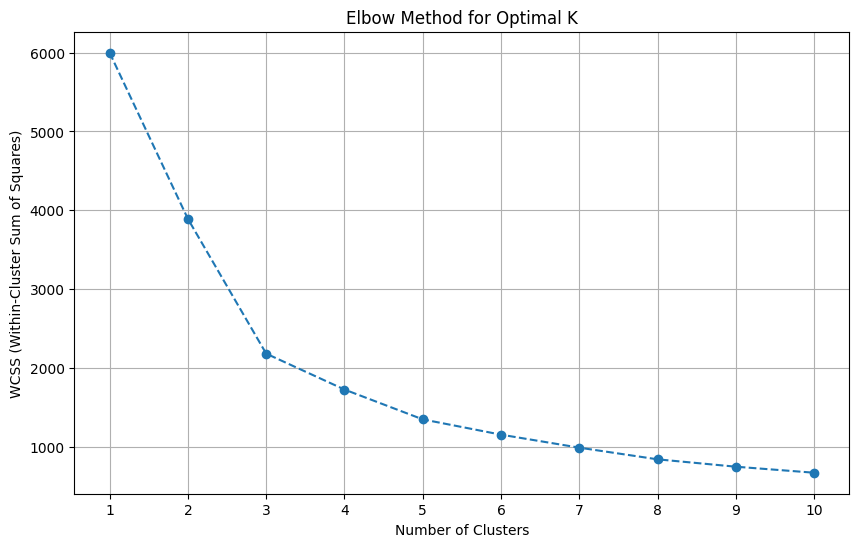

Elbow Method plot generated. Look for the 'elbow' point to identify the optimal number of clusters.


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
max_clusters = 10

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()
print("Elbow Method plot generated. Look for the 'elbow' point to identify the optimal number of clusters.")

### Análise do Resultado

> Observando o gráfico acima, notamos que a inércia (WCSS) cai rapidamente conforme aumentamos o número de clusters de 1 para 2 e de 2 para 3. No entanto, a partir de `k=3`, a taxa de redução diminui significativamente, formando o "cotovelo" da curva.
> Portanto, escolheremos k=3 para o nosso modelo. Isso nos permitirá categorizar os ataques cibernéticos em três níveis claros de severidade (ex: Baixo, Médio e Alto Impacto), o que é ideal para a criação do nosso target.

## Aplicando o algoritmo de clusterização K-Means




In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original (unscaled) DataFrame for plotting and further use
# X was defined earlier as dataset[['Financial Loss (in Million $)', 'Number of Affected Users']].copy()
X_clustered = X.copy()
X_clustered['Cluster'] = clusters

print("\nContagem de ataques por Cluster:")
print(X_clustered['Cluster'].value_counts().sort_index())
import seaborn as sns


Contagem de ataques por Cluster:
Cluster
0     460
1    1898
2     642
Name: count, dtype: int64


## Visualização dos clusters


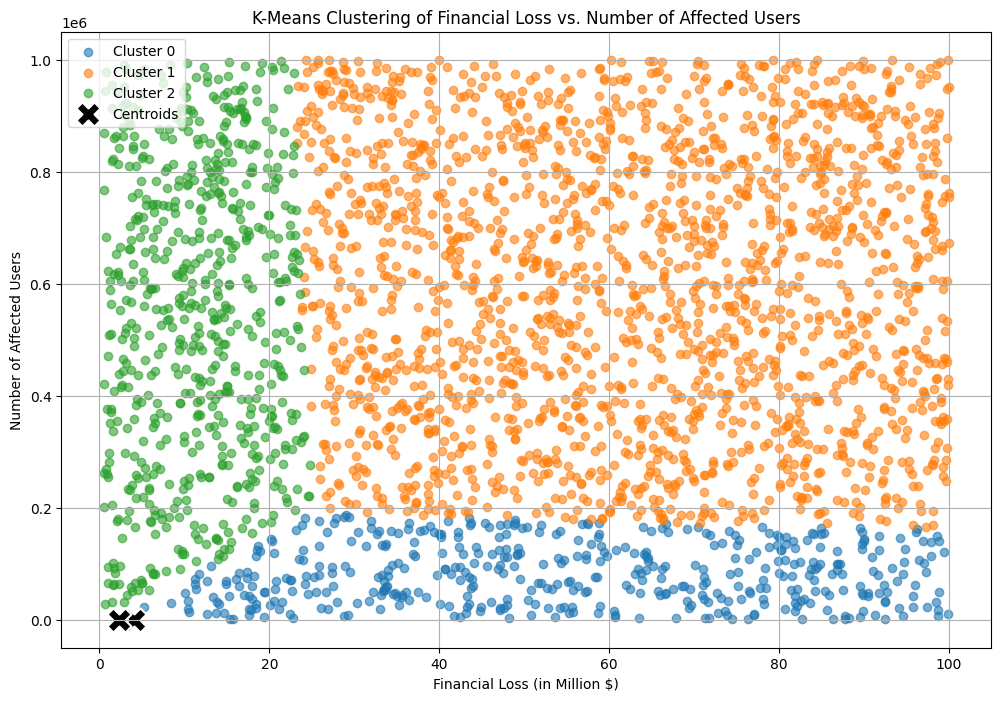

Scatter plot of clusters and centroids generated.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# X_clustered with 'Cluster' column is now available from the previous cell (4905f139)

# Get the cluster centroids (they are in scaled coordinates)
centroids_scaled = kmeans.cluster_centers_

# Inverse transform the centroids to the original scale for plotting
# Note: scaler and kmeans should be available from previous cells.
centroids = scaler.inverse_transform(centroids_scaled)

plt.figure(figsize=(12, 8))

# Plot each cluster separately to get distinct colors in the legend
for i in range(kmeans.n_clusters):
    plt.scatter(
        X_clustered[X_clustered['Cluster'] == i]['Financial Loss (in Million $)'],
        X_clustered[X_clustered['Cluster'] == i]['Number of Affected Users'],
        label=f'Cluster {i}',
        alpha=0.6
    )

# Plot the centroids
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker='X',
    s=300,
    c='black',
    edgecolors='white',
    linewidths=1.5,
    label='Centroids'
)

plt.title('K-Means Clustering of Financial Loss vs. Number of Affected Users')
plt.xlabel('Financial Loss (in Million $)')
plt.ylabel('Number of Affected Users')
plt.legend()
plt.grid(True)
plt.show()

print("Scatter plot of clusters and centroids generated.")

## Resultados da Clusterização

> A aplicação do algoritmo K-Means `(com $k=3$, definido pelo Elbow Method)` permitiu segmentar os ataques em três perfis de comportamento distintos. Abaixo, a interpretação de cada grupo baseada nas médias calculadas:

### Grupo 0 (Impacto Financeiro Concentrado):
 - **Contagem**: 460 registros
 - **Características**: Incidentes limitados a um **pequeno número de usuários (abaixo de ~200k)**, mas que abrangem todo o espectro de perda financeira (de $0 a $100M). Isso sugere ataques altamente direcionados (alvos de alto valor) onde poucas vítimas geram prejuízos variados.

### Grupo 1 (Impacto Crítico - A Maioria)
 - **Contagem**: 1.898 registros
 - **Características**: Incidentes que combinam **altas perdas financeiras (geralmente acima de $25M)** com um **alto número de usuários afetados**. Representa o cenário de "tempestade perfeita" em cibersegurança.

### Grupo 2 (Impacto Social/Disperso)
 - **Contagem**: 642 registros
 - **Características**: Incidentes com **baixo custo financeiro** direto, mas que ainda afetam uma **grande quantidade de usuários**. Típico de vazamentos de dados em serviços gratuitos ou ataques de interrupção que não geram roubo direto de fundos.



## Criação de Novo Dataset com Nível de Impacto

In [ ]:
# Map cluster labels to descriptive impact levels
impact_mapping = {
    0: 'Impacto Médio',
    1: 'Impacto Crítico',
    2: 'Impacto Alto'
}

# Add the 'Nível de Impacto' column to X_clustered
X_clustered['Nível de Impacto'] = X_clustered['Cluster'].map(impact_mapping)

# Create a copy of the original dataset
new_dataset = dataset.copy()
# new_dataset.drop('Cluster', axis=1) # No need to drop 'Cluster' from new_dataset directly, as it's not there yet

# Add the 'Nível de Impacto' column from X_clustered to the new_dataset
# Ensure the indices align if X_clustered was derived directly from dataset
new_dataset['Nível de Impacto'] = X_clustered['Nível de Impacto']

# Remove the original 'Financial Loss (in Million $)' and 'Number of Affected Users' columns
new_dataset = new_dataset.drop(columns=['Financial Loss (in Million $)', 'Number of Affected Users'])

print("Novo dataset com a coluna 'Nível de Impacto' e colunas originais de perdas removidas (primeiras 5 linhas):")
display(new_dataset.head())

Novo dataset com a coluna 'Nível de Impacto' e colunas originais de perdas removidas (primeiras 5 linhas):


,Country,Year,Attack Type,Target Industry,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours),Nível de Impacto
0,China,2019,Phishing,Education,Hacker Group,Unpatched Software,VPN,63,Impacto Crítico
1,China,2019,Ransomware,Retail,Hacker Group,Unpatched Software,Firewall,71,Impacto Crítico
2,India,2017,Man-in-the-Middle,IT,Hacker Group,Weak Passwords,VPN,20,Impacto Crítico
3,UK,2024,Ransomware,Telecommunications,Nation-state,Social Engineering,AI-based Detection,7,Impacto Crítico
4,Germany,2018,Man-in-the-Middle,IT,Insider,Social Engineering,VPN,68,Impacto Crítico


# Pré-processamento





> Antes de iniciar o treinamento da Árvore de Decisão, precisamos adaptar os dados brutos para um formato que o algoritmo consiga interpretar. Esta etapa envolve três ações fundamentais:

1. **Limpeza de Dados**: Verificação e remoção de eventuais valores nulos que possam gerar erros no treinamento.

2. **Codificação de Variáveis (Label Encoding)**: A maioria dos algoritmos de Machine Learning (incluindo a implementação de Árvores de Decisão do scikit-learn) não processa texto diretamente. Portanto, converteremos variáveis categóricas (como Attack Type, Country, Protocol) em números inteiros (ex: "Malware" torna-se 0, "DDoS" torna-se 1).

3.** Divisão Treino/Teste**: Separaremos o dataset em dois conjuntos:

    - Conjunto de Treino (70%): Usado para o modelo aprender os padrões e regras.

    - Conjunto de Teste (30%): Dados "inéditos" que usaremos ao final para validar se o modelo realmente aprendeu a generalizar ou se apenas decorou os dados.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Criar uma cópia para não alterar o dataset original
df_prep = new_dataset.copy()
df_prep.drop
# 2. Verificar se existem valores nulos (Limpeza básica)
print("Valores nulos antes:", df_prep.isnull().sum().sum())
df_prep = df_prep.dropna() # Remove linhas com nulos, se houver

# 3. Codificação de Variáveis Categóricas (Label Encoding)
# O modelo precisa de números. Vamos transformar "Malware" em 0, "DDoS" em 1, etc.
le = LabelEncoder()

# Seleciona apenas as colunas que são texto (object)
colunas_texto = df_prep.select_dtypes(include=['object']).columns

# Dicionário para guardar os codificadores (caso queira inverter depois)
encoders = {}

for col in colunas_texto:
    # Não vamos codificar o nosso Target ('Nível de Impacto') agora se quisermos ver os nomes na árvore
    # Mas para o X (features), tudo tem que ser número.
    if col != 'Nível de Impacto':
        # Cria um encoder para essa coluna
        encoder = LabelEncoder()
        df_prep[col] = encoder.fit_transform(df_prep[col])
        encoders[col] = encoder # Guarda para referência futura

# 4. Separando X (Features) e y (Target)
X = df_prep.drop('Nível de Impacto', axis=1)
y = df_prep['Nível de Impacto']

# 5. Divisão em Treino e Teste (70% Treino, 30% Teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Pré-processamento concluído!")
#Shape = Rows, Columns
print(f"Tamanho do Treino: {X_train.shape}")
print(f"Tamanho do Teste: {X_test.shape}")
print("\nVisualização dos dados transformados (X):")
display(X_train.head())

Valores nulos antes: 0
Pré-processamento concluído!
Tamanho do Treino: (2100, 8)
Tamanho do Teste: (900, 8)

Visualização dos dados transformados (X):


,Country,Year,Attack Type,Target Industry,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
611,4,2018,5,6,1,2,2,61
530,1,2021,0,6,0,1,1,13
2787,6,2017,3,0,2,0,4,20
49,6,2017,3,6,0,3,4,31
1883,8,2016,1,3,2,2,1,49


# Processamento

## Treinamento e testes

> Para garantir a robustez da nossa previsão, não utilizaremos apenas um algoritmo. Testaremos três abordagens diferentes de Aprendizado de Máquina para ver qual performa melhor na classificação do Nível de Impacto:

- **Árvore de Decisão (Decision Tree)**: Modelo base, fácil de interpretar, que cria regras "se-então".

- **Random Forest (Floresta Aleatória)**: Cria centenas de árvores de decisão aleatórias e combina seus resultados. Tende a ser muito mais preciso e robusto que uma árvore única.

- ** Regressão Logística**: Um algoritmo linear estatístico. Servirá como nossa "linha de base" (baseline). Se modelos complexos não superarem a Regressão Logística, significa que o problema é linearmente simples.

🚀 Iniciando avaliação detalhada...

Tabela de Resultados Comparativos:


,Algoritmo,Acurácia,Precisão,Recall,F1-Score,Tempo de Treino (s)
0,Decision Tree,0.6311,0.5039,0.6311,0.5035,0.0071
1,Random Forest,0.6178,0.4459,0.6178,0.4978,0.4083
2,Logistic Regression,0.6367,0.4053,0.6367,0.4953,0.6856


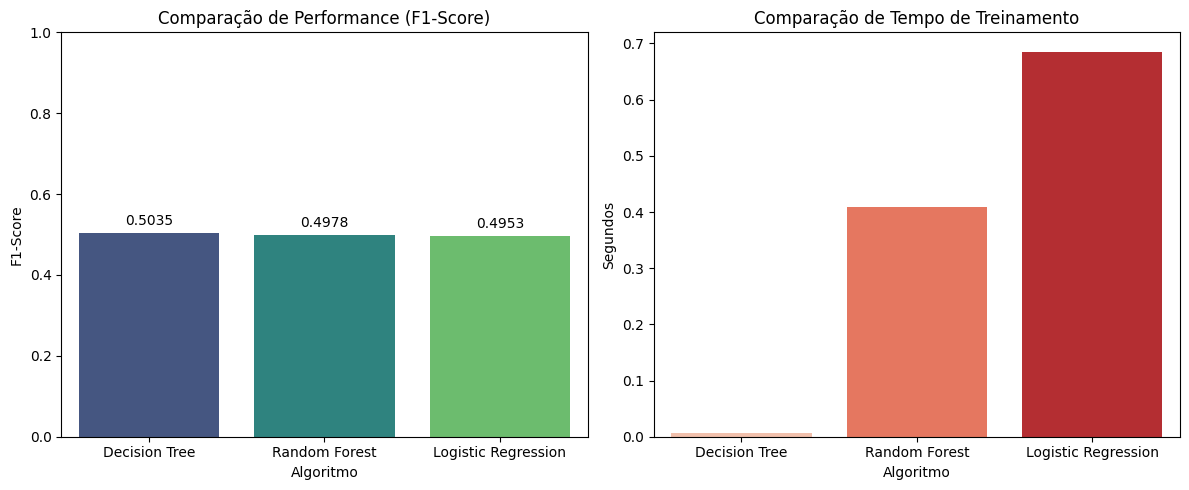

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Configuração dos Modelos
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42)
}

# Lista para armazenar os resultados
results_data = []

print("🚀 Iniciando avaliação detalhada...\n")

# 2. Loop de Execução
for name, model in models.items():
    # --- A. Medindo o Tempo de Treino ---
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    execution_time = end_time - start_time

    # --- B. Gerando Previsões ---
    y_pred = model.predict(X_test)

    # --- C. Calculando Métricas de Performance ---
    # 'weighted': Calcula métricas para cada classe e encontra a média ponderada pelo número de exemplos (ideal para classes desbalanceadas)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Guardando no dicionário
    results_data.append({
        "Algoritmo": name,
        "Acurácia": acc,
        "Precisão": prec,
        "Recall": rec,
        "F1-Score": f1,
        "Tempo de Treino (s)": execution_time
    })

# 3. Criando Tabela Final
df_results = pd.DataFrame(results_data)

# Exibindo a tabela numérica
print("Tabela de Resultados Comparativos:")
display(df_results.round(4)) # Arredonda para 4 casas decimais

# 4. Visualização Gráfica
# Gráfico 1: Performance (F1-Score)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
# CORREÇÃO: Adicionado hue='Algoritmo' e legend=False
sns.barplot(x='Algoritmo', y='F1-Score', data=df_results, hue='Algoritmo', palette='viridis', legend=False)
plt.title('Comparação de Performance (F1-Score)')
plt.ylim(0, 1.0)
for index, row in df_results.iterrows():
    plt.text(index, row['F1-Score'] + 0.02, f"{row['F1-Score']:.4f}", ha='center')

# Gráfico 2: Tempo de Execução
plt.subplot(1, 2, 2)
# CORREÇÃO: Adicionado hue='Algoritmo' e legend=False
sns.barplot(x='Algoritmo', y='Tempo de Treino (s)', data=df_results, hue='Algoritmo', palette='Reds', legend=False)
plt.title('Comparação de Tempo de Treinamento')
plt.ylabel('Segundos')

plt.tight_layout()
plt.show()

# Análise de performance


## Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 1. Recriamos o modelo (limitado para visualização, ou usamos o normal)
# Nota: Se quiser os números exatos do "torneio", use max_depth=5 (igual ao anterior).
# Se quiser os números da árvore "bonita" que vamos desenhar, use max_depth=3.
dt_final = DecisionTreeClassifier(max_depth=5, random_state=42)

# 2. TREINAMOS o modelo (Isso faltava no seu código!)
dt_final.fit(X_train, y_train)

# 3. Geramos as previsões
y_pred_final = dt_final.predict(X_test)

# 4. Imprimimos o relatório detalhado
print("Detalhes de Performance por Classe (Decision Tree):")
print(classification_report(y_test, y_pred_final))

Detalhes de Performance por Classe (Decision Tree):
                 precision    recall  f1-score   support

   Impacto Alto       0.30      0.02      0.03       189
Impacto Crítico       0.64      0.98      0.77       573
  Impacto Médio       0.22      0.01      0.03       138

       accuracy                           0.63       900
      macro avg       0.39      0.34      0.28       900
   weighted avg       0.50      0.63      0.50       900



## Árvore aleatória

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# --- Gerando dados para o Pior Modelo (Random Forest) ---

# 1. Recriamos o modelo com os mesmos parâmetros do teste
rf_worst = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Treinamos
rf_worst.fit(X_train, y_train)

# 3. Previsões
y_pred_worst = rf_worst.predict(X_test)

# 4. Relatório Detalhado
print("Detalhes de Performance por Classe (Pior Modelo - Random Forest):")
print(classification_report(y_test, y_pred_worst))

Detalhes de Performance por Classe (Pior Modelo - Random Forest):
                 precision    recall  f1-score   support

   Impacto Alto       0.20      0.03      0.05       189
Impacto Crítico       0.63      0.96      0.76       573
  Impacto Médio       0.00      0.00      0.00       138

       accuracy                           0.62       900
      macro avg       0.28      0.33      0.27       900
   weighted avg       0.45      0.62      0.50       900



## Análise Detalhada de Performance e Destaques por Classe

> Abaixo, descrevemos o desempenho do melhor e do pior algoritmo avaliado, destacando especificamente quais valores da variável-alvo (target) apresentaram os resultados extremos.

### Melhor Algoritmo: Decision Tree (Árvore de Decisão)
> O algoritmo Decision Tree foi o mais eficaz, apresentando o melhor equilíbrio entre as métricas e eficiência computacional.

#### Performance
  - Acurácia: 63.11%
  - Precisão: 50,39%
  - Recall: 63.11%
  - F1-Score: 0,5035

#### Destaque dos Valores da Classe

##### Melhor Resultado (Valor: "Impacto Crítico")
> Esta classe obteve um desempenho superior, com F1-Score de 0,77 e Recall de 0,98. O modelo foi capaz de recuperar 98% das instâncias reais desta categoria.
> Sendo a classe majoritária no dataset, o modelo priorizou o aprendizado de suas características para maximizar a acurácia global.

##### Pior Resultado (Valor: "Impacto Médio")
> Esta classe apresentou o desempenho mais crítico, com F1-Score de apenas 0,03 e Recall de 0,01.
> O algoritmo teve extrema dificuldade em distinguir os padrões desta classe intermediária, confundindo-a quase sistematicamente com a classe dominante.

### Pior Algoritmo: Random Forest
> O algoritmo Random Forest apresentou o desempenho inferior no conjunto de teste, falhando severamente na generalização das classes minoritárias.

#### Performance
  - Acurácia: 61,78%
  - Precisão: 44,59%
  - Recall: 61,78%
  - F1-Score: 0,4978

#### Destaque dos Valores da Classe

##### Melhor Resultado (Valor: "Impacto Crítico")
> Mesmo no pior modelo, esta classe manteve índices altos (F1-Score de 0,76 e Recall de 0,96), novamente devido ao desbalanceamento dos dados que favorece a classe mais frequente.

##### Pior Resultado (Valor: "Impacto Médio")
> O resultado para este valor foi nulo (0,00) em todas as métricas (Precisão, Recall e F1-Score).
> O modelo Random Forest ignorou completamente esta classe, sendo incapaz de classificar corretamente uma única instância de "Impacto Médio" no conjunto de teste, demonstrando um viés total para a classe majoritária.

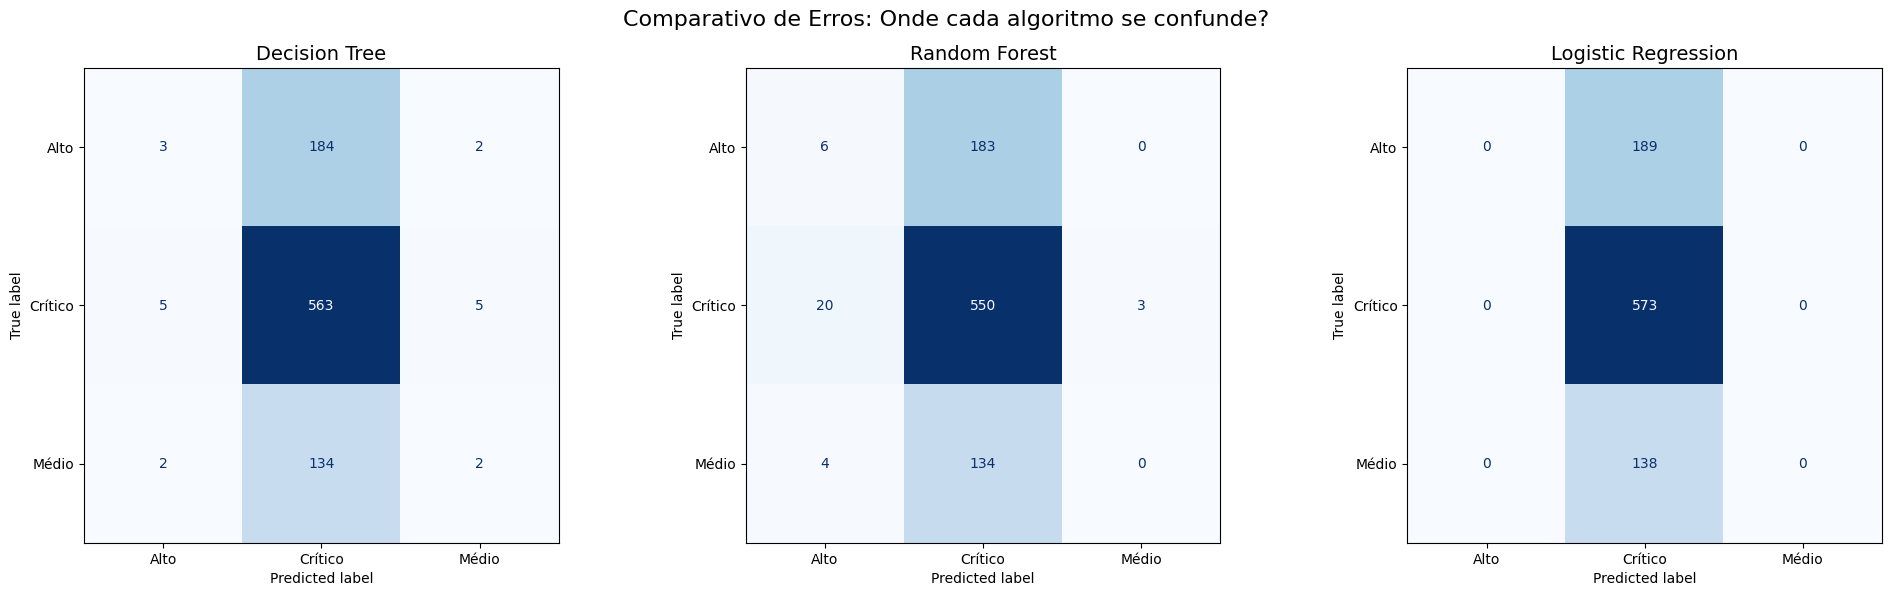

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Re-treinando rapidamente os 3 modelos para garantir que estão na memória
# (Se você já rodou a célula de comparação antes, pode pular essa parte de fit)
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42)
}

# Configura o tamanho da figura (Largo para caber as 3)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for ax, (name, model) in zip(axes, models.items()):
    # Treina
    model.fit(X_train, y_train)

    # Plota a matriz no eixo específico (ax)
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=['Alto', 'Crítico', 'Médio'], # Ajuste se a ordem do seu LabelEncoder for diferente!
        cmap='Blues',
        values_format='d',
        colorbar=False, # Remove a barra de cor para limpar
        ax=ax
    )
    ax.set_title(f'{name}', fontsize=14)
    ax.grid(False)

plt.suptitle('Comparativo de Erros: Onde cada algoritmo se confunde?', fontsize=16)
plt.tight_layout()
plt.show()